In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import re 
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt

In [92]:
# Custom transformer to remove commas from 'Votes' column
class RemoveCommasTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        if 'Votes' in X_copy.columns:
            X_copy['Votes'] = X_copy['Votes'].str.replace(',', '').astype(float)
        return X_copy


In [93]:
# Load the data
# Load the data with specified encoding
# Load the data with specified encoding
data = pd.read_csv('movierating.csv', encoding='latin1')

In [94]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [96]:
data.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


In [97]:
data.isnull()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,True,False,True,True,False,False,True,True
15507,False,False,True,False,True,True,True,True,True,True


In [98]:
data.dropna(subset=["Rating"], inplace = True)

In [99]:
data.isnull()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15501,False,False,True,False,False,False,False,False,False,False
15503,False,False,False,False,False,False,False,False,False,False
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False


In [100]:
# Split features and target variable
X = data.drop(columns=['Rating', 'Name'])  # Features
y = data['Rating']  # Target variable


In [101]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
# Define preprocessing steps for numerical and categorical features
numeric_features = ['Year', 'Duration', 'Votes']
numeric_transformer = Pipeline(steps=[
    ('remove_commas', RemoveCommasTransformer()),  # Custom transformer to remove commas
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [103]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [104]:
# Define the function to extract numeric values from 'Duration'
def extract_numeric_duration(duration):
    if isinstance(duration, str):  # Check if input is a string
        try:
            return float(re.search(r'\d+', duration).group())
        except AttributeError:
            return None  # Return None if no numeric value is found
    else:
        return None  # Return None if input is not a string

# Apply the function to preprocess 'Duration' in training and testing data
X_train['Duration'] = X_train['Duration'].apply(extract_numeric_duration)
X_test['Duration'] = X_test['Duration'].apply(extract_numeric_duration)

In [105]:
# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor())])

In [106]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('remove_commas',
                                                                   RemoveCommasTransformer()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Year', 'Duration',
                                                   'Votes']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Genre', 'Director',
                                                   'Actor 1', 'Actor 2',
                                                   'Actor 3'])])),
                ('regressor', RandomForestRegressor())])

In [107]:
# Make predictions
y_pred = model.predict(X_test)


In [108]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1.173827673611111


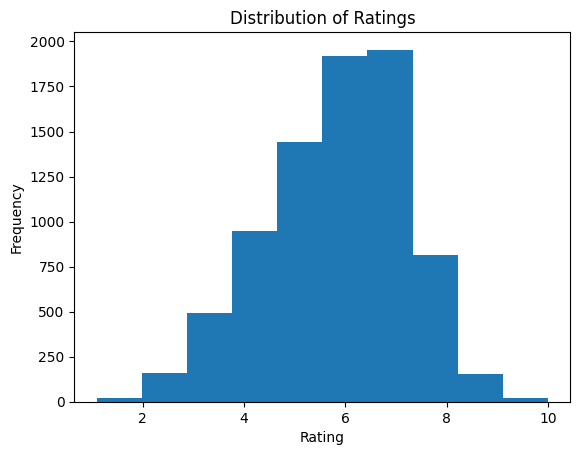

In [109]:
 #Exploratory Data Analysis (EDA) Visualizations
# For example, let's create a histogram for the 'Rating' column
plt.hist(y)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()


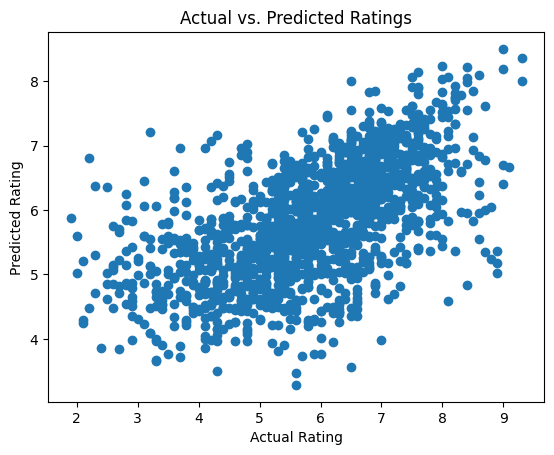

In [110]:
# Model Evaluation Visualizations
# Let's plot the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Ratings')
plt.show()

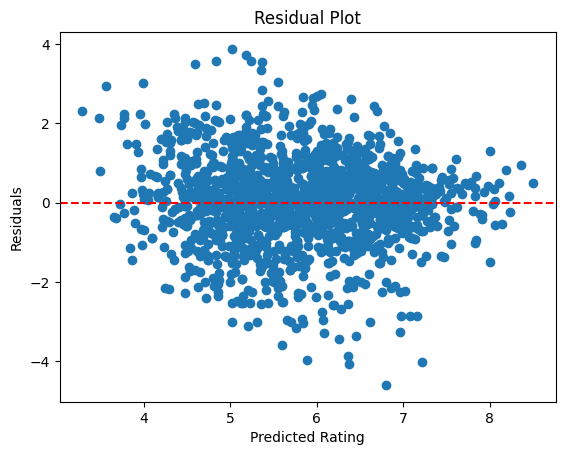

In [111]:
#Additionally, you can plot the residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Rating')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.show()